## EDA for DH Project -- Music

In [1]:
# importing libraries

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd

In [2]:
data = pd.read_csv('music.csv')

In [3]:
data.describe()

,artist.familiarity,artist.hotttnesss,artist.latitude,artist.location,artist.longitude,artist.similar,artist.terms_freq,release.id,release.name,song.artist_mbtags,...,song.mode,song.mode_confidence,song.start_of_fade_out,song.tatums_confidence,song.tatums_start,song.tempo,song.time_signature,song.time_signature_confidence,song.title,song.year
count,10000.000000,10000.000000,10000.000000,10000.000,10000.000000,10000.0,1.000000e+04,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.565230,0.385552,13.904283,0.078,-23.923863,0.0,2.248903e+02,371024.058400,23.096000,0.000033,...,0.691000,0.477765,229.883436,0.507875,0.299886,122.900913,3.564443,0.599785,10.011400,934.704600
std,0.160528,0.143647,20.356379,7.800,43.723359,0.0,2.239216e+04,236777.828209,1322.901526,0.003330,...,0.462104,0.191269,112.024303,0.332357,0.510925,35.204746,1.266620,8.991567,945.486852,996.650657
min,0.000000,0.000000,-41.280540,0.000,-162.436500,0.0,0.000000e+00,0.000000,0.000000,0.000000,...,0.000000,0.000000,-21.394000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.467570,0.325266,0.000000,0.000,-73.948880,0.0,9.476125e-01,172858.000000,0.000000,0.000000,...,0.000000,0.360000,168.855750,0.237000,0.110692,96.959500,3.000000,0.097750,0.000000,0.000000
50%,0.563584,0.380742,0.000000,0.000,0.000000,0.0,9.999728e-01,333103.000000,0.000000,0.000000,...,1.000000,0.487000,213.864500,0.500000,0.191520,120.156500,4.000000,0.551000,0.000000,0.000000
75%,0.668020,0.453858,34.419250,0.000,0.000000,0.0,1.000000e+00,573532.500000,0.000000,0.000000,...,1.000000,0.606000,266.274750,0.774250,0.294743,144.006750,4.000000,0.864000,0.000000,2000.000000
max,1.000000,1.082503,69.651020,780.000,174.767140,0.0,2.239217e+06,823599.000000,85555.000000,0.333000,...,1.000000,1.000000,1813.426000,9.227560,12.245830,262.828000,7.000000,898.891000,94496.000000,2010.000000


In [4]:
data.columns

Index(['artist.familiarity', 'artist.hotttnesss', 'artist.id',
       'artist.latitude', 'artist.location', 'artist.longitude', 'artist.name',
       'artist.similar', 'artist.terms', 'artist.terms_freq', 'release.id',
       'release.name', 'song.artist_mbtags', 'song.artist_mbtags_count',
       'song.bars_confidence', 'song.bars_start', 'song.beats_confidence',
       'song.beats_start', 'song.duration', 'song.end_of_fade_in',
       'song.hotttnesss', 'song.id', 'song.key', 'song.key_confidence',
       'song.loudness', 'song.mode', 'song.mode_confidence',
       'song.start_of_fade_out', 'song.tatums_confidence', 'song.tatums_start',
       'song.tempo', 'song.time_signature', 'song.time_signature_confidence',
       'song.title', 'song.year'],
      dtype='object')

some observations: 
1. there seems to be a lot of missing data in terms of year released and title. these were the key things i was hoping to analyse, so I need to see how this is. 
2. I am glad that genre and year released is available! But is the genre based on today's definition or the definition it had when it came out?

In [5]:
# lets analyse the genre:

# find unique instances of the definition of pop 
data[['artist.terms']][(data['artist.terms'].str.contains('.+ pop$') == 1)]['artist.terms'].unique()

array(['dance pop', 'brill building pop', 'british pop', 'german pop',
       'french pop', 'twee pop', 'teen pop', 'power pop', 'latin pop',
       'instrumental pop', 'j pop', 'cantonese pop', 'space age pop',
       'dream pop', 'bubblegum pop', 'chamber pop', 'jangle pop',
       'hip pop', 'experimental pop', 'noise pop', 'swamp pop',
       'mandarin pop', 'indie pop'], dtype=object)

Im going to say "pop" is defined as any genre with pop as the last word in the name. so dance pop is pop, but pop rap is not. 

this also has me thinking about country of origin too, should we be considering pop on a global scale or just in the US? does this data set even have that information? -- oh yeah it has artist location! we could do a map of artist location and how popular their music is?

In [6]:
# how many data points do we have that have a year? (ie doesnt equal 0)

valid_years = data[data['song.year'] != 0]

valid_years['song.year'].describe()

count    4680.000000
mean     1997.232051
std        11.686691
min      1926.000000
25%      1993.000000
50%      2001.000000
75%      2006.000000
max      2010.000000
Name: song.year, dtype: float64

Text(0.5, 1.0, 'Number of Songs per Year in music.csv')

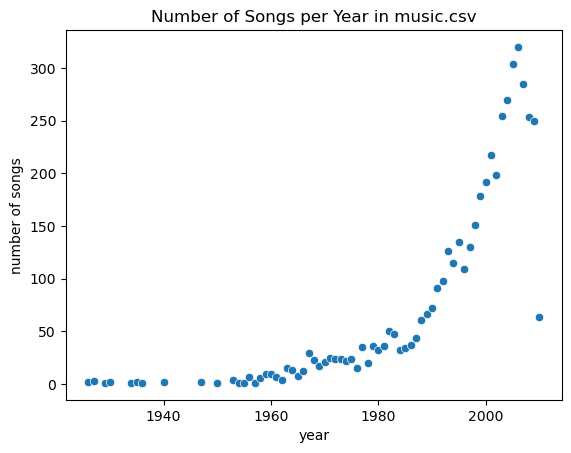

In [7]:
# how many songs per year do we have?

songs_per_year = valid_years.groupby('song.year').size()


sns.scatterplot(data = songs_per_year)
plt.xlabel('year')
plt.ylabel('number of songs')
plt.title('Number of Songs per Year in music.csv')

So this is some EDA I did in terms of the question I wanted to explore, but now I'm going to spend some time exploring the other topics m
my group mates wanted to talk about

In [8]:
data['song.tempo'].describe()

count    10000.000000
mean       122.900913
std         35.204746
min          0.000000
25%         96.959500
50%        120.156500
75%        144.006750
max        262.828000
Name: song.tempo, dtype: float64

In [9]:
# now let's find valid tempos:

valid_tempos = data[data['song.tempo'] != 0]

valid_tempos[['artist.terms','song.tempo']]

,artist.terms,song.tempo
0,hip hop,92.198
1,blue-eyed soul,121.274
2,salsa,100.070
3,pop rock,119.293
4,pop punk,129.738
...,...,...
9995,sympho black metal,140.185
9996,ballad,77.072
9997,lovers rock,118.123
9998,zydeco,137.663


In [10]:
# now I want to see some possible parameters we could plot: 

data.columns

Index(['artist.familiarity', 'artist.hotttnesss', 'artist.id',
       'artist.latitude', 'artist.location', 'artist.longitude', 'artist.name',
       'artist.similar', 'artist.terms', 'artist.terms_freq', 'release.id',
       'release.name', 'song.artist_mbtags', 'song.artist_mbtags_count',
       'song.bars_confidence', 'song.bars_start', 'song.beats_confidence',
       'song.beats_start', 'song.duration', 'song.end_of_fade_in',
       'song.hotttnesss', 'song.id', 'song.key', 'song.key_confidence',
       'song.loudness', 'song.mode', 'song.mode_confidence',
       'song.start_of_fade_out', 'song.tatums_confidence', 'song.tatums_start',
       'song.tempo', 'song.time_signature', 'song.time_signature_confidence',
       'song.title', 'song.year'],
      dtype='object')

(0.0, 800.0)

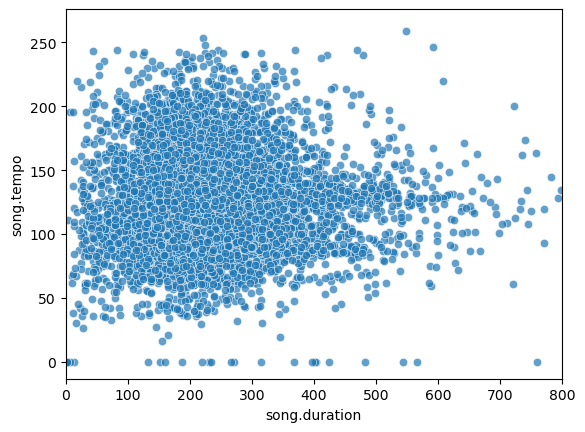

In [11]:
params = ['song.duration','song.hottness','song.mode','song.loudness']

sns.scatterplot(data = data, x = 'song.duration', y = 'song.tempo', alpha = 0.7)
plt.xlim(0,800)

# so this is messy

In [12]:
# let's try seeing how tempo varies with genre:
data['artist.simplified_term'] = data['artist.terms'].dropna().str.split().apply(lambda s: s[-1])

pop_songs = data[data['artist.simplified_term'] == 'pop']

In [13]:
data['artist.simplified_term'].value_counts()[0:14
                                             ]

rock          1231
pop            665
metal          485
jazz           461
hop            425
blues          385
blues-rock     346
house          304
rap            283
ccm            255
music          220
chanson        208
punk           196
reggae         183
Name: artist.simplified_term, dtype: int64

In [33]:
# let's find the most popular simplied genres: (to be popular, there must be 50 or more songs in the data set with that genre)

popular_genres = data.groupby('artist.simplified_term').filter(lambda x: len(x) >= 50)['artist.simplified_term'].value_counts().index

popular_genres

Index(['rock', 'pop', 'metal', 'jazz', 'hop', 'blues', 'blues-rock', 'house',
       'rap', 'ccm', 'music', 'chanson', 'punk', 'reggae', 'gospel',
       'post-grunge', 'folk', 'soul', 'dancehall', 'funk', 'chill-out',
       'salsa', 'beat', 'country', 'tonk', 'post-hardcore', 'trance', 'swing',
       'folk-pop', 'soundtrack', 'listening', 'hardcore', 'comedy', 'wave',
       'disco', 'flamenco', 'meditation', 'bluegrass'],
      dtype='object')

Text(0, 0.5, 'Duration (seconds)')

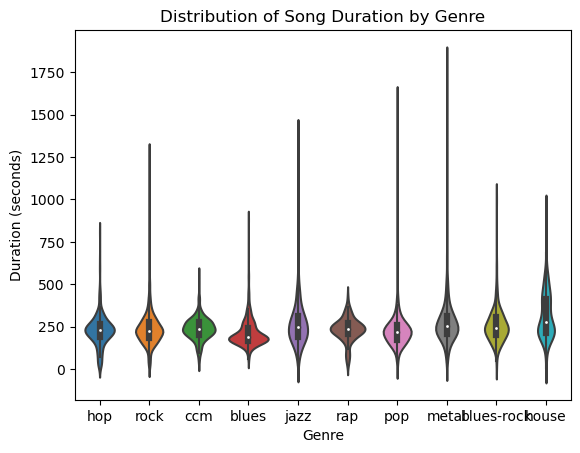

In [34]:
popular_genres_data = data[data['artist.simplified_term'].isin(popular_genres[0:10])] # only taking the top 10 for plotting 


sns.violinplot(data = popular_genres_data, x = 'artist.simplified_term', y = 'song.duration')
plt.title('Distribution of Song Duration by Genre')
plt.xlabel('Genre')
plt.ylabel('Duration (seconds)')

Text(0, 0.5, 'Tempo (BPM)')

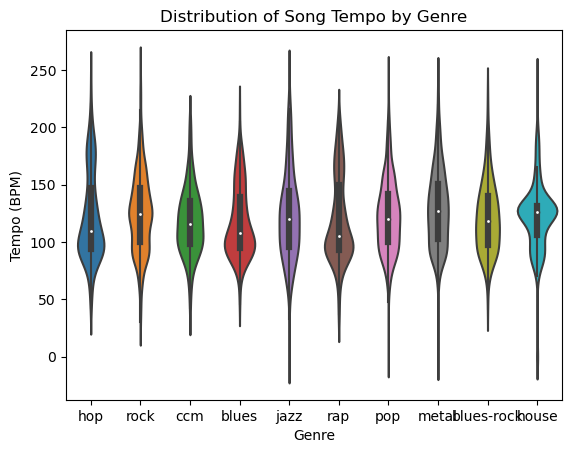

In [35]:
# now let's do it again for tempo!

sns.violinplot(data = popular_genres_data, x = 'artist.simplified_term', y = 'song.tempo')
plt.title('Distribution of Song Tempo by Genre')
plt.xlabel('Genre')
plt.ylabel('Tempo (BPM)')


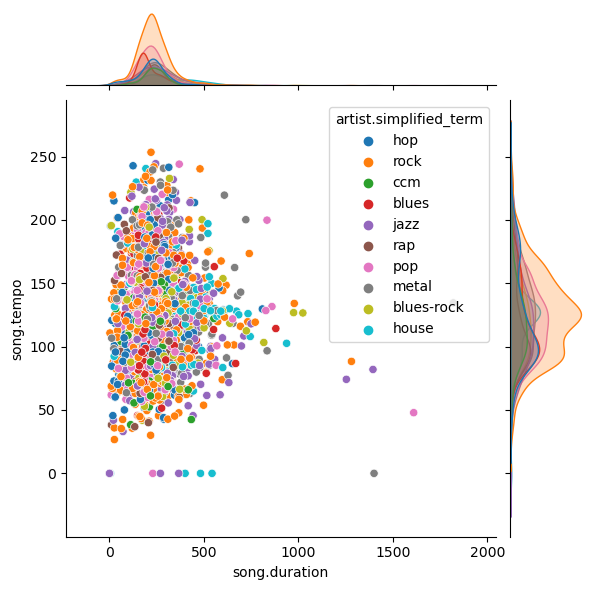

In [36]:
# do these variables affect each other?

sns.jointplot(data = popular_genres_data, hue = 'artist.simplified_term', x = 'song.duration', y = 'song.tempo')

In [18]:
# now i want to see how year affects genre!

# keeping only the features I care about: 
def remove_years(data, label):
    '''remove the data points where there is no data on year'''
    return data[data[label] !=0]

def remove_empty_columns(data):
    '''remove a row if the sum of the row is zero''' 
    for c in data.columns:
        if np.sum(data[c]) == 0:
            data.drop(c, axis = 1)
    return data 

In [19]:
data_simplified = (remove_years(popular_genres_data, 'song.year')
                   .drop(['artist.location','song.title', 'artist.similar', 'release.name'], axis = 1)
                  )
data_simplified = remove_empty_columns(data_simplified)

In [20]:
data_simplified

,artist.familiarity,artist.hotttnesss,artist.id,artist.latitude,artist.longitude,artist.name,artist.terms,artist.terms_freq,release.id,song.artist_mbtags,...,song.mode,song.mode_confidence,song.start_of_fade_out,song.tatums_confidence,song.tatums_start,song.tempo,song.time_signature,song.time_signature_confidence,song.year,artist.simplified_term
1,0.630630,0.417500,ARMJAGH1187FB546F3,35.14968,-90.04892,The Box Tops,blue-eyed soul,1.000000,300822,0.0,...,0,0.430,137.915,0.969,0.20627,121.274,4.0,0.384,1969,soul
3,0.630382,0.454231,AR7G5I41187FB4CE6C,0.00000,0.00000,Adam Ant,pop rock,0.988584,287650,0.0,...,1,0.749,217.124,0.601,0.56254,119.293,4.0,0.000,1982,rock
4,0.651046,0.401724,ARXR32B1187FB57099,0.00000,0.00000,Gob,pop punk,0.887288,611336,0.0,...,1,0.371,198.699,1.000,0.13576,129.738,4.0,0.562,2007,punk
8,0.426668,0.332276,AR8ZCNI1187B9A069B,0.00000,0.00000,Planet P Project,new wave,0.959766,358182,0.0,...,1,0.652,258.990,0.121,1.22595,86.643,4.0,0.487,1984,wave
15,0.636424,0.447935,ARD842G1187B997376,43.64856,-79.38533,Blue Rodeo,country rock,1.000000,135122,0.0,...,1,0.829,486.034,0.377,0.05047,119.826,4.0,0.756,1987,rock
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9967,0.599465,0.392747,ARRSIQ11187B98F216,34.05349,-118.24532,Kevin Max,ccm,0.965021,479760,0.0,...,1,0.519,202.548,0.168,0.33016,88.002,4.0,0.331,2008,ccm
9970,0.749797,0.551552,AR9YWMS1187FB43A34,0.00000,0.00000,Dinosaur Jr.,indie rock,1.000000,251204,0.0,...,1,0.649,189.980,0.525,0.08976,185.452,1.0,0.000,1985,rock
9981,0.891854,0.548228,ARH9HS41187FB5BC6F,0.00000,0.00000,New Found Glory,pop punk,0.999970,401052,0.0,...,1,0.658,191.280,0.505,0.15255,192.070,4.0,0.937,2009,punk
9989,0.772230,0.511577,ARJGQJD1187B997A00,0.00000,0.00000,It Dies Today,post-hardcore,1.000000,479604,0.0,...,1,0.396,179.409,0.278,0.16984,98.377,3.0,0.991,2006,post-hardcore


In [21]:
data_simplified.columns

Index(['artist.familiarity', 'artist.hotttnesss', 'artist.id',
       'artist.latitude', 'artist.longitude', 'artist.name', 'artist.terms',
       'artist.terms_freq', 'release.id', 'song.artist_mbtags',
       'song.artist_mbtags_count', 'song.bars_confidence', 'song.bars_start',
       'song.beats_confidence', 'song.beats_start', 'song.duration',
       'song.end_of_fade_in', 'song.hotttnesss', 'song.id', 'song.key',
       'song.key_confidence', 'song.loudness', 'song.mode',
       'song.mode_confidence', 'song.start_of_fade_out',
       'song.tatums_confidence', 'song.tatums_start', 'song.tempo',
       'song.time_signature', 'song.time_signature_confidence', 'song.year',
       'artist.simplified_term'],
      dtype='object')

In [22]:
data_plotting = (data_simplified[['artist.familiarity',
                                 'artist.hotttnesss','song.duration',
                                 'song.hotttnesss','song.key','song.loudness','song.mode',
                                  'song.tempo','song.time_signature'
                                ]]
                                 )

In [23]:
# only uncomment if you want to see the general relationships between variables, not always needed

# for i in data_plotting.columns[0:len(data_plotting.columns) //2]:
#     for j in data_plotting.columns[len(data_plotting.columns) //2:]:
#         sns.jointplot(data = data_plotting, x = i, y = j)

In [24]:
data_plotting.head()

,artist.familiarity,artist.hotttnesss,song.duration,song.hotttnesss,song.key,song.loudness,song.mode,song.tempo,song.time_signature
1,0.630630,0.417500,148.03546,-1.000000,6.0,-9.843,0,121.274,4.0
3,0.630382,0.454231,233.40363,-1.000000,0.0,-9.013,1,119.293,4.0
4,0.651046,0.401724,209.60608,0.604501,2.0,-4.501,1,129.738,4.0
8,0.426668,0.332276,269.81832,0.265861,4.0,-13.496,1,86.643,4.0
15,0.636424,0.447935,491.12771,0.405116,7.0,-8.576,1,119.826,4.0


In [37]:
# fig, axs = plt.subplots(4,4, figsize = (8,8), squeeze = False, sharey = True, sharex = False)
   

In [26]:
# just to get a general idea of relationships -- not needed for all runs
# for i in range(0,4):
#     for j in range(4,8):
#         sns.scatterplot(ax = axs[i,j-4],x = data_plotting.iloc[:,i], y = data_plotting.iloc[:,j])
#         axs[i,j-4].set_xlabel(data_plotting.columns[i])
#         axs[i,j-4].set_ylabel(data_plotting.columns[j])

# fig

There are very little correlations, and so im going to just test the time parameter now. 

In [28]:
data_simplified.head()

,artist.familiarity,artist.hotttnesss,artist.id,artist.latitude,artist.longitude,artist.name,artist.terms,artist.terms_freq,release.id,song.artist_mbtags,...,song.mode,song.mode_confidence,song.start_of_fade_out,song.tatums_confidence,song.tatums_start,song.tempo,song.time_signature,song.time_signature_confidence,song.year,artist.simplified_term
1,0.630630,0.417500,ARMJAGH1187FB546F3,35.14968,-90.04892,The Box Tops,blue-eyed soul,1.000000,300822,0.0,...,0,0.430,137.915,0.969,0.20627,121.274,4.0,0.384,1969,soul
3,0.630382,0.454231,AR7G5I41187FB4CE6C,0.00000,0.00000,Adam Ant,pop rock,0.988584,287650,0.0,...,1,0.749,217.124,0.601,0.56254,119.293,4.0,0.000,1982,rock
4,0.651046,0.401724,ARXR32B1187FB57099,0.00000,0.00000,Gob,pop punk,0.887288,611336,0.0,...,1,0.371,198.699,1.000,0.13576,129.738,4.0,0.562,2007,punk
8,0.426668,0.332276,AR8ZCNI1187B9A069B,0.00000,0.00000,Planet P Project,new wave,0.959766,358182,0.0,...,1,0.652,258.990,0.121,1.22595,86.643,4.0,0.487,1984,wave
15,0.636424,0.447935,ARD842G1187B997376,43.64856,-79.38533,Blue Rodeo,country rock,1.000000,135122,0.0,...,1,0.829,486.034,0.377,0.05047,119.826,4.0,0.756,1987,rock


In [29]:
pivoted_data_simplified = (data_simplified.pivot_table(index = 'song.year',
                            columns = 'artist.simplified_term',
                            values = 'artist.hotttnesss',
                            aggfunc = 'count',
                            fill_value = 0
                            )
                            )

pivoted_data_simplified

artist.simplified_term,ccm,chanson,gospel,hop,post-hardcore,punk,rock,salsa,soul,wave
song.year,,,,,,,,,,
1936,0,0,1,0,0,0,0,0,0,0
1953,0,1,0,0,0,0,0,0,0,0
1956,0,2,0,0,0,0,0,0,0,0
1957,0,0,0,0,0,0,0,0,1,0
1958,0,0,0,0,0,0,0,0,4,0
1959,0,0,0,0,0,0,3,0,1,0
1960,0,0,0,0,0,0,1,0,1,0
1961,0,0,0,0,0,0,2,0,0,0
1962,0,0,0,0,0,0,2,0,0,0


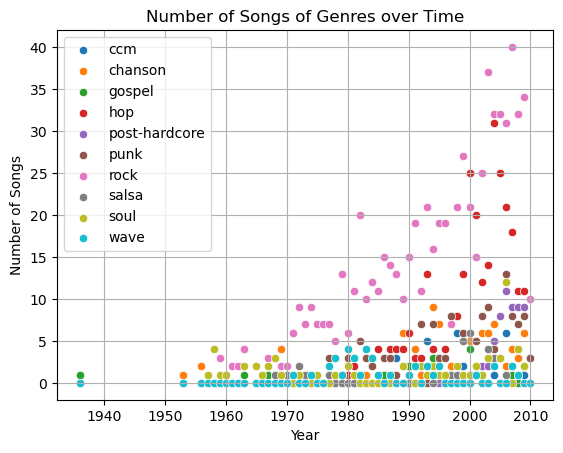

In [42]:
for i in pivoted_data_simplified.columns:
    sns.scatterplot(data = pivoted_data_simplified, x = 'song.year', y = i, label = f'{i}')
    
plt.title('Number of Songs of Genres over Time')
plt.ylabel('Number of Songs')
plt.xlabel('Year')
plt.grid()
plt.legend();

There's an issue with pop being gone for some reason, but each genre tends to follow the same curve, so it just requires going back a little. . .